
# DSCI 552 - Homework 8

### Name : Ashwin Chafale
### Github username : chafale
### USC-ID : 1990624801

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.svm import LinearSVC
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

### 1 (a) Download the [Breast Cancer Wisconsin (Diagnostic) Data-set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

This data-set has  IDs, classes (Benign=B, Malignant=M), and 30 attributes which are as follows:
    1) ID number
    2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)


The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

### Data Pre-processing

In [2]:
features = ["ID", "Diagnosis"]
real_valued_features = ["Radius","Texture","Perimeter","Area","Smoothness","Compactness","Concavity","Concave_Points","Symmetry","Fractal_Dimension"]

# Creating column headers for 30 real valued features
for feature in real_valued_features:
    features.append(feature + "_Mean")
for feature in real_valued_features:
    features.append(feature + "_SE")
for feature in real_valued_features:
    features.append(feature + "_Worst")

wdbc_df = pd.read_csv("../Data/wdbc.csv", names=features)
wdbc_df

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
le = LabelEncoder()
wdbc_df['Diagnosis'] = le.fit_transform(wdbc_df['Diagnosis'])
wdbc_df

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
malignant = wdbc_df.loc[wdbc_df['Diagnosis'] == 1]
malignant

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [5]:
benign = wdbc_df.loc[wdbc_df['Diagnosis'] == 0]
benign

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,925292,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [6]:
X_benign = benign.loc[:,'Radius_Mean':'Fractal_Dimension_Worst']
y_benign = benign['Diagnosis']
X_malignant = malignant.loc[:,'Radius_Mean':'Fractal_Dimension_Worst']
y_malignant = malignant['Diagnosis']

## 1 (b) Monte-Carlo Simulation
Run the Monte-Carlo simulation for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

### i. Supervised Learning:  $\mathscr{L}_1$-Penalized SVM
For this portion of the code I have referred my previous HW and have reused the code

In the below code I have used MinMaxScaler() to normalize the data

In [7]:
best_params = []
best_CV_score = []
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
Fscore_train = []
Fscore_test = []
AUC_train = []
AUC_test = []
confusion_matrix_train = []
confusion_matrix_test = []
fpr_train_list = []
fpr_test_list = []
tpr_train_list = []
tpr_test_list = []
threshold_train = []
threshold_test = []

# Cross validation parameters <C> for SVM
cv_params = {'C': np.logspace(-5, 1, 20)}

# Run Monte-Carlo Simulation 30 times
for M in range(1,31):
    print("==== ITERATION {} ====".format(M))

    seed=np.random.randint(0, 1000)
    X_train_benign, X_test_benign, y_train_benign, y_test_benign = train_test_split(X_benign, y_benign, train_size=0.8, test_size=0.2, random_state=seed)
    X_train_malignant, X_test_malignant, y_train_malignant, y_test_malignant = train_test_split(X_malignant, y_malignant, train_size=0.8, test_size=0.2, random_state=seed)

    X_train = pd.concat([X_train_benign, X_train_malignant], ignore_index=False)
    X_test = pd.concat([X_test_benign, X_test_malignant], ignore_index=False)
    y_train = pd.concat([y_train_benign, y_train_malignant], ignore_index=False)
    y_test = pd.concat([y_test_benign, y_test_malignant], ignore_index=False)

    # Normalize the X-features
    min_max_scaler = MinMaxScaler()
    X_train_normalized = min_max_scaler.fit_transform(X_train)
    X_test_normalized = min_max_scaler.fit_transform(X_test)

    svc = LinearSVC(penalty='l1', dual=False, random_state=seed, max_iter=100000)
    svc_L1_CV = GridSearchCV(estimator=svc, param_grid=cv_params, cv=5)
    svc_L1_CV.fit(X_train_normalized, y_train)
    best_params.append(svc_L1_CV.best_params_)
    best_CV_score.append(svc_L1_CV.best_score_)

    print("Best C values = {}".format(svc_L1_CV.best_params_))
    print("CV Score = {}".format(svc_L1_CV.best_score_))
    print("")

    # Find the predicted "y" values and "y" scores
    y_predict_train = svc_L1_CV.predict(X_train_normalized)
    y_predict_test = svc_L1_CV.predict(X_test_normalized)
    y_scores_test = svc_L1_CV.decision_function(X_test_normalized)
    y_scores_tng = svc_L1_CV.decision_function(X_train_normalized)

    # accuracy
    accuracy_train.append(accuracy_score(y_train, y_predict_train))
    accuracy_test.append(accuracy_score(y_test, y_predict_test))

    # precision
    precision_train.append(precision_score(y_train, y_predict_train))
    precision_test.append(precision_score(y_test, y_predict_test))

    # recall
    recall_train.append(recall_score(y_train, y_predict_train))
    recall_test.append(recall_score(y_test, y_predict_test))

    # F-score
    Fscore_train.append(f1_score(y_train, y_predict_train))
    Fscore_test.append(f1_score(y_test, y_predict_test))

    # AUC
    AUC_train.append(roc_auc_score(y_train, y_scores_tng))
    AUC_test.append(roc_auc_score(y_test, y_scores_test))

    # Confusion Matrix
    confusion_matrix_test.append(confusion_matrix(y_test, y_predict_test))
    confusion_matrix_train.append(confusion_matrix(y_train, y_predict_train))

    # ROC values
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_scores_test)
    fpr_test_list.append(fpr_test)
    tpr_test_list.append(tpr_test)
    threshold_test.append(thresholds_test)
    fpr_tng, tpr_tng, thresholds_tng = metrics.roc_curve(y_train, y_scores_tng)
    fpr_train_list.append(fpr_tng)
    tpr_train_list.append(tpr_tng)
    threshold_train.append(thresholds_tng)

==== ITERATION 1 ====
Best C values = {'C': 4.832930238571752}
CV Score = 0.9801953601953602

==== ITERATION 2 ====
Best C values = {'C': 0.5455594781168515}
CV Score = 0.9713553113553115

==== ITERATION 3 ====
Best C values = {'C': 2.3357214690901213}
CV Score = 0.9625396825396825

==== ITERATION 4 ====
Best C values = {'C': 4.832930238571752}
CV Score = 0.9713308913308915

==== ITERATION 5 ====
Best C values = {'C': 2.3357214690901213}
CV Score = 0.9757997557997559

==== ITERATION 6 ====
Best C values = {'C': 4.832930238571752}
CV Score = 0.9714041514041515

==== ITERATION 7 ====
Best C values = {'C': 0.5455594781168515}
CV Score = 0.9757997557997559

==== ITERATION 8 ====
Best C values = {'C': 1.1288378916846884}
CV Score = 0.9802197802197803

==== ITERATION 9 ====
Best C values = {'C': 2.3357214690901213}
CV Score = 0.9714041514041515

==== ITERATION 10 ====
Best C values = {'C': 2.3357214690901213}
CV Score = 0.9757753357753358

==== ITERATION 11 ====
Best C values = {'C': 2.33572

In [8]:
print("Summary data for Supervised Learning : ")
supervised = pd.DataFrame(
    {
        'Training_Accuracy':accuracy_train,
        'Test_Accuracy':accuracy_test,
        'Training_Precision':precision_train,
        'Test_Precision':precision_test,
        'Training_Recall':recall_train,
        'Test_Recall':recall_test,
        'Training_Fscore':Fscore_train,
        'Test_Fscore':Fscore_test,
        'Training_AUC':AUC_train,
        'Test_AUC':AUC_test
    }
)
supervised

Summary data for Supervised Learning : 


,Training_Accuracy,Test_Accuracy,Training_Precision,Test_Precision,Training_Recall,Test_Recall,Training_Fscore,Test_Fscore,Training_AUC,Test_AUC
0,0.991189,0.956522,0.994012,1.000000,0.982249,0.883721,0.988095,0.938272,0.998692,0.995801
1,0.975771,0.930435,0.987654,0.857143,0.946746,0.976744,0.966767,0.913043,0.994768,0.989018
2,0.986784,0.921739,0.988024,0.826923,0.976331,1.000000,0.982143,0.905263,0.996927,1.000000
3,0.986784,0.739130,0.988024,0.589041,0.976331,1.000000,0.982143,0.741379,0.997965,0.997739
4,0.986784,0.956522,0.988024,1.000000,0.976331,0.883721,0.982143,0.938272,0.999003,0.965762
5,0.991189,0.765217,1.000000,0.614286,0.976331,1.000000,0.988024,0.761062,0.998298,0.987726
6,0.980176,0.965217,0.987805,0.914894,0.958580,1.000000,0.972973,0.955556,0.995723,0.997416
7,0.988987,0.904348,0.993976,0.807692,0.976331,0.976744,0.985075,0.884211,0.997363,0.987080
8,0.986784,0.895652,0.993939,0.803922,0.970414,0.953488,0.982036,0.872340,0.997778,0.986111
9,0.984581,0.895652,0.993902,0.781818,0.964497,1.000000,0.978979,0.877551,0.997052,0.991925


#### Supervised Learning : Training Confusion Matrix

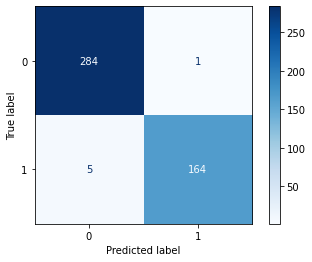

In [10]:
# Training CM
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_train[20], display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)

#### Supervised Learning : Test Confusion Matrix

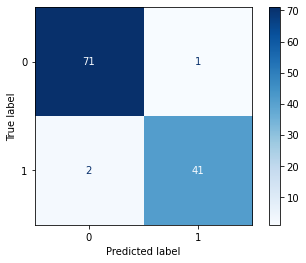

In [11]:
# Test CM
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test[20], display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)

#### Supervised Learning : ROC curve

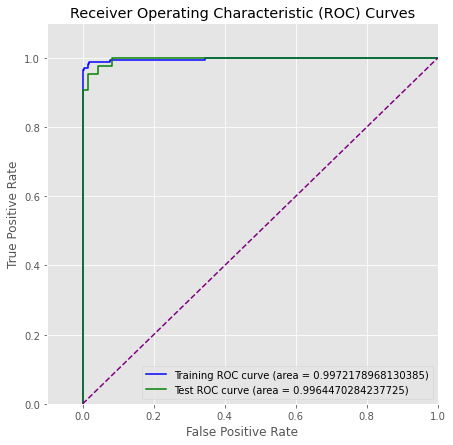

In [12]:
# Plot the ROC for the training and test sets
plt.style.use('ggplot')
plt.figure(figsize=(7,7))
plt.plot(fpr_train_list[20], tpr_train_list[20], color='blue', label='Training ROC curve (area = {})'.format(AUC_train[20]))
plt.plot(fpr_test_list[20], tpr_test_list[20], color='green', label='Test ROC curve (area = {})'.format(AUC_test[20]))
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## 1 b) ii. Semi-Supervised Learning/ Self-training

Here I have used custom normalized() function to normalized the data
Reference of the code : <https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range>

In [13]:
def normalized(dataframe):
    df_norm = ((dataframe-dataframe.min())/(dataframe.max()-dataframe.min()))
    return df_norm

In [14]:
best_params_SemiSupervised =[]
best_CV_score_SemiSupervised=[]
accuracy_train_SemiSupervised=[]
accuracy_test_SemiSupervised=[]
precision_train_SemiSupervised=[]
precision_test_SemiSupervised=[]
recall_train_SemiSupervised=[]
recall_test_SemiSupervised=[]
Fscore_train_SemiSupervised=[]
Fscore_test_SemiSupervised=[]
AUC_train_SemiSupervised=[]
AUC_test_SemiSupervised=[]
confusion_matrix_train_SemiSupervised=[]
confusion_matrix_test_SemiSupervised=[]
fpr_train_SemiSupervised=[]
fpr_test_SemiSupervised=[]
tpr_train_SemiSupervised=[]
tpr_test_SemiSupervised=[]
thresholds_train_SemiSupervised=[]
thresholds_test_SemiSupervised=[]

# Cross validation parameters <C> for SVM
paramsL1semi_dict = {'C': np.logspace(-5, 1, 20)}

# Run the Monte-Carlo Simulation 30 times
for M in range(1,31):
    print("==== ITERATION {} ====".format(M))

    seed=np.random.randint(0, 1000)
    # Test-train split ---> 20 % test data
    X_train_benign, X_test_benign, y_train_benign, y_test_benign = train_test_split(X_benign, y_benign, train_size=0.8, test_size=0.2, random_state=seed)
    X_train_malignant, X_test_malignant, y_train_malignant, y_test_malignant = train_test_split(X_malignant, y_malignant, train_size=0.8, test_size=0.2, random_state=seed)

    X_train = pd.concat([X_train_benign, X_train_malignant], ignore_index=False)
    X_test = pd.concat([X_test_benign, X_test_malignant], ignore_index=False)
    y_train = pd.concat([y_train_benign, y_train_malignant], ignore_index=False)
    y_test = pd.concat([y_test_benign, y_test_malignant], ignore_index=False)

    # Combine X and y training dataframe
    temp = pd.concat([X_train, y_train], axis=1, ignore_index=False)
    temp_benign = temp[temp['Diagnosis'] == 0] # Benign = 0
    temp_malignant = temp[temp['Diagnosis'] == 1] # Malignant = 1

    # Randomly select 50%
    train_benign, test_benign = train_test_split(temp_benign, train_size=0.5, test_size=0.5, random_state=seed)
    train_malignant, test_malignant = train_test_split(temp_malignant, train_size=0.5, test_size=0.5, random_state=seed)

    # Recombine the benign and malignant class data and name them as labeled and unlabeled data
    df_labeled = pd.concat([train_benign, train_malignant], ignore_index=False)
    df_unlabeled = pd.concat([test_benign, test_malignant], ignore_index=False)

    X_labeled = df_labeled.loc[:,'Radius_Mean':'Fractal_Dimension_Worst']
    y_labeled = df_labeled['Diagnosis']
    X_unlabeled = df_unlabeled.loc[:,'Radius_Mean':'Fractal_Dimension_Worst']
    y_unlabeled = df_unlabeled['Diagnosis']

    # Normalize the data
    X_labeled_normalized = normalized(X_labeled)
    X_unlabeled_normalized = normalized(X_unlabeled)

    labeled = X_labeled_normalized[:]
    unlabeled = X_unlabeled_normalized[:]

    svc = LinearSVC(penalty='l1', dual=False, random_state=seed, max_iter=100000)
    svm_SemiSupervised = GridSearchCV(estimator=svc, param_grid=paramsL1semi_dict, cv=5)
    svm_SemiSupervised.fit(labeled, y_labeled)
    best_params_SemiSupervised.append(svm_SemiSupervised.best_params_)
    best_CV_score_SemiSupervised.append(svm_SemiSupervised.best_score_)

    print("Best C values = {}".format(svm_SemiSupervised.best_params_))
    print("CV Score = {}".format(svm_SemiSupervised.best_score_))
    print("")

    C = svm_SemiSupervised.best_params_['C']
    svm_SemiSupervised_retrain = LinearSVC(C=C, penalty='l1', dual=False, random_state=seed, max_iter=100000)
    svm_SemiSupervised_retrain.fit(labeled, y_labeled)

    y_temp = y_labeled.copy()
    for data in range(len(unlabeled)):
        # Find the unlabeled data point that is the farthest from the decision boundary of the SVM
        dist = svm_SemiSupervised_retrain.decision_function(unlabeled)
        unlabeled['dist'] = abs(dist)
        max_dist = unlabeled.nlargest(1,'dist')
        max_index = max_dist.index[0]
        unlabeled.drop(['dist'], axis=1, inplace=True)

        # predict for the unlabeled data point
        y_predict = svm_SemiSupervised_retrain.predict(np.array(unlabeled.loc[max_index]).reshape(1, -1))

        # Add the newly labeled data point to the labeled data
        labeled.loc[max_index] = unlabeled.loc[max_index]
        y_temp.loc[max_index] = y_predict[0]
        unlabeled.drop([max_index], inplace=True)

        # Retrain the SVM
        svm_SemiSupervised_retrain.fit(labeled, y_temp)


    X_train_normalized = normalized(X_train)
    X_test_normalized = normalized(X_test)

    # Find the predicted "y" values and "y" scores
    y_predict_train = svm_SemiSupervised_retrain.predict(X_train_normalized)
    y_predict_test = svm_SemiSupervised_retrain.predict(X_test_normalized)
    y_scores_train = svm_SemiSupervised_retrain.decision_function(X_train_normalized)
    y_scores_test = svm_SemiSupervised_retrain.decision_function(X_test_normalized)


    # accuracy
    accuracy_train_SemiSupervised.append(accuracy_score(y_train,y_predict_train))
    accuracy_test_SemiSupervised.append(accuracy_score(y_test,y_predict_test))

    # precision
    precision_train_SemiSupervised.append(precision_score(y_train,y_predict_train))
    precision_test_SemiSupervised.append(precision_score(y_test,y_predict_test))

    # recall
    recall_train_SemiSupervised.append(recall_score(y_train,y_predict_train))
    recall_test_SemiSupervised.append(recall_score(y_test,y_predict_test))

    # F-score
    Fscore_train_SemiSupervised.append(f1_score(y_train,y_predict_train))
    Fscore_test_SemiSupervised.append(f1_score(y_test,y_predict_test))

    # AUC
    AUC_train_SemiSupervised.append(roc_auc_score(y_train,y_scores_train))
    AUC_test_SemiSupervised.append(roc_auc_score(y_test,y_scores_test))

    # confusion matrix
    confusion_matrix_train_SemiSupervised.append(confusion_matrix(y_train,y_predict_train))
    confusion_matrix_test_SemiSupervised.append(confusion_matrix(y_test,y_predict_test))

    # ROC values
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test,y_scores_test)
    fpr_test_SemiSupervised.append(fpr_test)
    tpr_test_SemiSupervised.append(tpr_test)
    thresholds_test_SemiSupervised.append(thresholds_test)
    fpr_tng, tpr_tng, thresholds_tng = metrics.roc_curve(y_train,y_scores_train)
    fpr_train_SemiSupervised.append(fpr_tng)
    tpr_train_SemiSupervised.append(tpr_tng)
    thresholds_train_SemiSupervised.append(thresholds_tng)

==== ITERATION 1 ====
Best C values = {'C': 2.3357214690901213}
CV Score = 0.9690821256038648

==== ITERATION 2 ====
Best C values = {'C': 0.5455594781168515}
CV Score = 0.9734299516908212

==== ITERATION 3 ====
Best C values = {'C': 1.1288378916846884}
CV Score = 0.9649275362318841

==== ITERATION 4 ====
Best C values = {'C': 2.3357214690901213}
CV Score = 0.9646376811594204

==== ITERATION 5 ====
Best C values = {'C': 1.1288378916846884}
CV Score = 0.9601932367149759

==== ITERATION 6 ====
Best C values = {'C': 1.1288378916846884}
CV Score = 0.9690821256038648

==== ITERATION 7 ====
Best C values = {'C': 0.5455594781168515}
CV Score = 0.9867632850241546

==== ITERATION 8 ====
Best C values = {'C': 4.832930238571752}
CV Score = 0.9911111111111112

==== ITERATION 9 ====
Best C values = {'C': 10.0}
CV Score = 0.9558454106280194

==== ITERATION 10 ====
Best C values = {'C': 1.1288378916846884}
CV Score = 0.9823188405797101

==== ITERATION 11 ====
Best C values = {'C': 0.5455594781168515}

In [15]:
print("Summary data for Semi-Supervised Learning : ")
semiSupervised = pd.DataFrame(
    {
        'Training_Accuracy':accuracy_train_SemiSupervised,
        'Test_Accuracy':accuracy_test_SemiSupervised,
        'Training_Precision':precision_train_SemiSupervised,
        'Test_Precision':precision_test_SemiSupervised,
        'Training_Recall':recall_train_SemiSupervised,
        'Test_Recall':recall_test_SemiSupervised,
        'Training_Fscore':Fscore_train_SemiSupervised,
        'Test_Fscore':Fscore_test_SemiSupervised,
        'Training_AUC':AUC_train_SemiSupervised,
        'Test_AUC':AUC_test_SemiSupervised
    }
)
semiSupervised

Summary data for Semi-Supervised Learning : 


,Training_Accuracy,Test_Accuracy,Training_Precision,Test_Precision,Training_Recall,Test_Recall,Training_Fscore,Test_Fscore,Training_AUC,Test_AUC
0,0.969163,0.895652,1.000000,0.781818,0.917160,1.000000,0.956790,0.877551,0.996346,0.996770
1,0.960352,0.947826,0.993464,1.000000,0.899408,0.860465,0.944099,0.925000,0.988892,0.991279
2,0.958150,0.973913,1.000000,1.000000,0.887574,0.930233,0.940439,0.963855,0.996263,0.995478
3,0.960352,0.947826,1.000000,0.877551,0.893491,1.000000,0.943750,0.934783,0.996263,0.998708
4,0.975771,0.939130,0.993750,1.000000,0.940828,0.837209,0.966565,0.911392,0.997052,0.994509
5,0.966960,0.878261,1.000000,0.763636,0.911243,0.976744,0.953560,0.857143,0.995204,0.981912
6,0.971366,0.965217,0.993671,0.975610,0.928994,0.930233,0.960245,0.952381,0.990491,0.998708
7,0.975771,0.947826,0.981707,0.911111,0.952663,0.953488,0.966967,0.931818,0.989183,0.992571
8,0.975771,0.843478,0.959302,0.711864,0.976331,0.976744,0.967742,0.823529,0.997446,0.991602
9,0.918502,0.956522,1.000000,0.952381,0.781065,0.930233,0.877076,0.941176,0.995474,0.992248


#### Semi-Supervised Learning : Training Confusion matrix

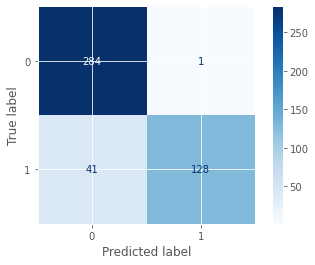

In [16]:
# Training CM
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_train_SemiSupervised[18], display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)

#### Semi-Supervised Learning : Test Confusion matrix

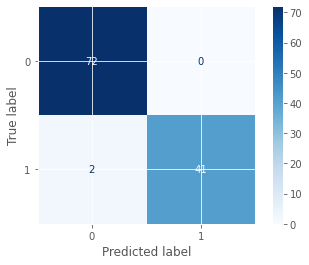

In [17]:
# Test CM
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test_SemiSupervised[18], display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)

#### Semi-Supervised Learning : ROC Curve

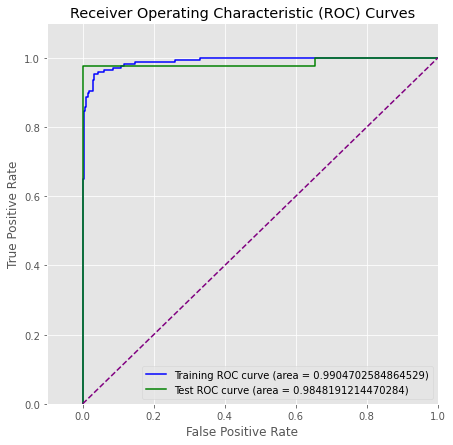

In [18]:
# Plot the ROC for the training and test sets
plt.style.use('ggplot')
plt.figure(figsize=(7,7))
plt.plot(fpr_train_SemiSupervised[18], tpr_train_SemiSupervised[18], color='blue', label='Training ROC curve (area = {})'.format(AUC_train_SemiSupervised[18]))
plt.plot(fpr_test_SemiSupervised[18], tpr_test_SemiSupervised[18], color='green', label='Test ROC curve (area = {})'.format(AUC_test_SemiSupervised[18]))
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## 1 (b) iii. Unsupervised Learning: K-means

#### How do you make sure that the algorithm was not trapped in a local minimum?
In scikit-learn's **KMeans()** package, we can randomly initializing the **random_state** parameter and change the default value of the **n_init** parameter. By making these changes we can make sure that the algorithm is not trapped in a local minimum. Alternatively, we can also use the K-means++ algorithm.

In [19]:
labels_Kmeans = []
cluster_centers = []
accuracy_train_Kmeans = []
accuracy_test_Kmeans = []
precision_train_Kmeans = []
precision_test_Kmeans = []
recall_train_Kmeans = []
recall_test_Kmeans = []
Fscore_train_Kmeans = []
Fscore_test_Kmeans = []
AUC_train_Kmeans = []
AUC_test_Kmeans = []
confusion_matrix_train_Kmeans = []
confusion_matrix_test_Kmeans = []
fpr_train_Kmeans = []
tpr_train_Kmeans = []
thresholds_train_Kmeans = []
fpr_test_Kmeans = []
tpr_test_Kmeans = []
thresholds_test_Kmeans = []

# Run Monte-Carlo Simulation 30 times
for n in range(1, 31):
    print('==== ITERATION {} ===='.format(n))

    seed=np.random.randint(0, 1000)
    X_train_benign, X_test_benign, y_train_benign, y_test_benign = train_test_split(X_benign, y_benign, train_size=0.8, test_size=0.2, random_state=seed)
    X_train_malignant, X_test_malignant, y_train_malignant, y_test_malignant = train_test_split(X_malignant, y_malignant, train_size=0.8, test_size=0.2, random_state=seed)

    X_train = pd.concat([X_train_benign, X_train_malignant], ignore_index=False)
    X_test = pd.concat([X_test_benign, X_test_malignant], ignore_index=False)
    y_train = pd.concat([y_train_benign, y_train_malignant], ignore_index=False)
    y_test = pd.concat([y_test_benign, y_test_malignant], ignore_index=False)

    # Normalize the data
    X_train = normalized(X_train)
    X_test = normalized(X_test)

    # K-means classification for k=2
    KM = KMeans(n_clusters=2, random_state=seed, n_init=100).fit(X_train)
    labels = KM.labels_
    labels_Kmeans.append(labels)
    # Compute the centers of the clusters
    centers = KM.cluster_centers_
    cluster_centers.append(centers)
    print("K-mean cluster center: {}".format(centers))

    # Find the distance of all points to each of the clusters
    # Distance to Cluster 0
    dist_cluster0_train = []
    for index, row in X_train.iterrows():
        dist = euclidean(row, centers[0])
        dist_cluster0_train.append(dist)

    dist_cluster0_test = []
    for index, row in X_test.iterrows():
        dist = euclidean(row, centers[0])
        dist_cluster0_test.append(dist)

    # Distance to Cluster 1
    dist_cluster1_train = []
    for index, row in X_train.iterrows():
        dist = euclidean(row, centers[1])
        dist_cluster1_train.append(dist)

    dist_cluster1_test = []
    for index, row in X_test.iterrows():
        dist = euclidean(row, centers[1])
        dist_cluster1_test.append(dist)

    df_KM = pd.DataFrame(
        {
            'Diagnosis': y_train.copy(),
            'k_label': labels,
            'Dist_to_0': dist_cluster0_train,
            'Dist_to_1': dist_cluster1_train
        }
    )

    # Find the 30 closest points to the centers
    k_grouped = df_KM.groupby(['k_label'])
    closest0 = k_grouped.get_group(0).nsmallest(30, 'Dist_to_0')
    closest1 = k_grouped.get_group(1).nsmallest(30, 'Dist_to_1')

    # Find the majority class in each cluster based on the 30 closest points
    cluster0_maj = closest0.groupby(['k_label'])['Diagnosis'].agg(pd.Series.mode)
    cluster1_maj = closest1.groupby(['k_label'])['Diagnosis'].agg(pd.Series.mode)

    # Determine the predicted class
    Kmeans_predicted_class = []
    prob_cluster0_list = []
    prob_cluster1_list = []
    num=0
    for index, row in df_KM.iterrows():
        current_k = row['k_label']
        if current_k == 0:
            diagnosis_predict = cluster0_maj[0]
        else:
            diagnosis_predict = cluster1_maj[1]
        Kmeans_predicted_class.append(diagnosis_predict)
        prob_cluster0_list.append(1-(dist_cluster0_train[num]/(dist_cluster0_train[num]+dist_cluster1_train[num])))
        prob_cluster1_list.append(1-(dist_cluster1_train[num]/(dist_cluster0_train[num]+dist_cluster1_train[num])))
        num+=1
    df_KM['Predicted_Diagnosis'] = Kmeans_predicted_class

    # Classify test data based on proximity to the centers
    y_predict_test = KM.predict(X_test)

    # Calculate the "y" scores
    prob_cluster0_test_list = []
    prob_cluster1_test_list = []
    num2=0
    for y in y_predict_test:
        prob_cluster0_test_list.append(1-(dist_cluster0_test[num2]/(dist_cluster0_test[num2]+dist_cluster1_test[num2])))
        prob_cluster1_test_list.append(1-(dist_cluster1_test[num2]/(dist_cluster0_test[num2]+dist_cluster1_test[num2])))
        num2+=1

    # accuracy
    accuracy_train_Kmeans.append(accuracy_score(y_train, Kmeans_predicted_class))
    accuracy_test_Kmeans.append(accuracy_score(y_test, y_predict_test))

    # precision
    precision_train_Kmeans.append(precision_score(y_train, Kmeans_predicted_class))
    precision_test_Kmeans.append(precision_score(y_test, y_predict_test))

    # recall
    recall_train_Kmeans.append(recall_score(y_train, Kmeans_predicted_class))
    recall_test_Kmeans.append(recall_score(y_test, y_predict_test))

    # F-score
    Fscore_train_Kmeans.append(f1_score(y_train, Kmeans_predicted_class))
    Fscore_test_Kmeans.append(f1_score(y_test, y_predict_test))

    # AUC
    AUC_train_Kmeans.append(roc_auc_score(y_train, prob_cluster1_list))
    AUC_test_Kmeans.append(roc_auc_score(y_test, prob_cluster1_test_list))

    # confusion matrix
    confusion_matrix_train_Kmeans.append(confusion_matrix(y_train, Kmeans_predicted_class))
    confusion_matrix_test_Kmeans.append(confusion_matrix(y_test, y_predict_test))

    # ROC values
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, prob_cluster1_test_list)
    fpr_test_Kmeans.append(fpr_test)
    tpr_test_Kmeans.append(tpr_test)
    thresholds_test_Kmeans.append(thresholds_test)
    fpr_tng, tpr_tng, thresholds_tng = metrics.roc_curve(y_train, prob_cluster1_list)
    fpr_train_Kmeans.append(fpr_tng)
    tpr_train_Kmeans.append(tpr_tng)
    thresholds_train_Kmeans.append(thresholds_tng)
    print('')

==== ITERATION 1 ====
K-mean cluster center: [[0.51885908 0.39814605 0.51913876 0.37879531 0.46841884 0.4219497
  0.42295149 0.47670204 0.45909091 0.28650382 0.19923331 0.19259159
  0.18614192 0.13967783 0.17862875 0.25721703 0.12626714 0.31191451
  0.19242321 0.1300597  0.49433281 0.45369357 0.47854683 0.32838929
  0.49588711 0.3652604  0.3929924  0.66748367 0.33667657 0.25956347]
 [0.25560087 0.28700482 0.24728072 0.14417074 0.36118547 0.18314088
  0.1057748  0.13262686 0.34300597 0.25565042 0.06448987 0.18838621
  0.05999298 0.02885468 0.18431317 0.13336337 0.05897323 0.18089072
  0.17455671 0.08600375 0.205973   0.32085506 0.19287198 0.10006972
  0.36044495 0.14900002 0.13204235 0.26345901 0.22974539 0.15623381]]

==== ITERATION 2 ====
K-mean cluster center: [[0.26205669 0.28972269 0.24775348 0.14257179 0.42255747 0.17595516
  0.10024828 0.127017   0.33495623 0.25317116 0.07079284 0.19068209
  0.07001244 0.02817441 0.24661285 0.1698723  0.05775008 0.17867885
  0.14915004 0.0825998 

In [20]:
print("Summary data for Un-Supervised : Kmeans Algorithm ")
Kmeans = pd.DataFrame(
    {
        'Training_Accuracy':accuracy_train_Kmeans,
        'Test_Accuracy':accuracy_test_Kmeans,
        'Training_Precision':precision_train_Kmeans,
        'Test_Precision':precision_test_Kmeans,
        'Training_Recall':recall_train_Kmeans,
        'Test_Recall':recall_test_Kmeans,
        'Training_Fscore':Fscore_train_Kmeans,
        'Test_Fscore':Fscore_test_Kmeans,
        'Training_AUC':AUC_train_Kmeans,
        'Test_AUC':AUC_test_Kmeans
    }
)
Kmeans

Summary data for Un-Supervised : Kmeans Algorithm 


,Training_Accuracy,Test_Accuracy,Training_Precision,Test_Precision,Training_Recall,Test_Recall,Training_Fscore,Test_Fscore,Training_AUC,Test_AUC
0,0.933921,0.086957,0.960265,0.030303,0.857988,0.046512,0.906250,0.036697,0.017648,0.023902
1,0.936123,0.886957,0.954545,0.840909,0.869822,0.860465,0.910217,0.850575,0.976456,0.975775
2,0.922907,0.895652,0.929487,0.829787,0.857988,0.906977,0.892308,0.866667,0.978677,0.968346
3,0.936123,0.078261,0.937500,0.090909,0.887574,0.162791,0.911854,0.116667,0.019682,0.021641
4,0.927313,0.930435,0.959459,0.906977,0.840237,0.906977,0.895899,0.906977,0.977162,0.977067
5,0.936123,0.939130,0.960526,0.950000,0.863905,0.883721,0.909657,0.915663,0.977515,0.991925
6,0.927313,0.913043,0.947368,0.883721,0.852071,0.883721,0.897196,0.883721,0.980110,0.973514
7,0.925110,0.947826,0.965517,0.893617,0.828402,0.976744,0.891720,0.933333,0.976207,0.982235
8,0.929515,0.947826,0.947712,0.974359,0.857988,0.883721,0.900621,0.926829,0.978740,0.969315
9,0.922907,0.965217,0.946667,0.933333,0.840237,0.976744,0.890282,0.954545,0.972470,0.994509


#### Kmeans : Training Confusion Matrix

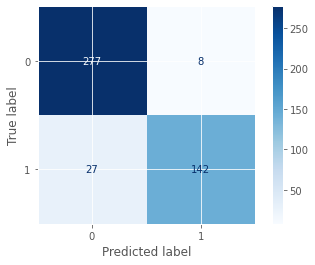

In [21]:
# Training CM
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_train_Kmeans[9], display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)

#### Kmeans : Test Confusion Matrix

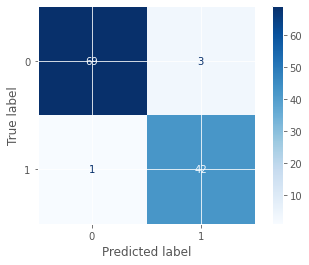

In [22]:
# Test CM
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test_Kmeans[9], display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)

#### Kmeans : ROC Curve

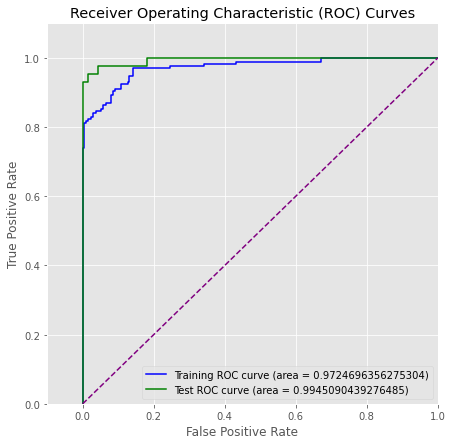

In [23]:
# Plot the ROC for the training and test sets
plt.style.use('ggplot')
plt.figure(figsize=(7,7))
plt.plot(fpr_train_Kmeans[9], tpr_train_Kmeans[9], color='blue', label='Training ROC curve (area = {})'.format(AUC_train_Kmeans[9]))
plt.plot(fpr_test_Kmeans[9], tpr_test_Kmeans[9], color='green', label='Test ROC curve (area = {})'.format(AUC_test_Kmeans[9]))
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## 1 (b) iv. Spectral Clustering:

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
train_labels_SC = []
test_labels_SC = []
accuracy_train_SC = []
accuracy_test_SC = []
precision_train_SC = []
precision_test_SC = []
recall_train_SC = []
recall_test_SC = []
Fscore_train_SC = []
Fscore_test_SC = []
confusion_matrix_train_SC = []
confusion_matrix_test_SC = []


# Run Monte-Carlo simulation 30 times
for n in range(1,31):
    print('==== ITERATION {} ===='.format(n))

    seed = np.random.randint(0, 1000)
    X_train_benign, X_test_benign, y_train_benign, y_test_benign = train_test_split(X_benign, y_benign, train_size=0.8, test_size=0.2, random_state=seed)
    X_train_malignant, X_test_malignant, y_train_malignant, y_test_malignant = train_test_split(X_malignant, y_malignant, train_size=0.8, test_size=0.2, random_state=seed)

    X_train = pd.concat([X_train_benign, X_train_malignant], ignore_index=False)
    X_test = pd.concat([X_test_benign, X_test_malignant], ignore_index=False)
    y_train = pd.concat([y_train_benign, y_train_malignant], ignore_index=False)
    y_test = pd.concat([y_test_benign, y_test_malignant], ignore_index=False)

    # Normalize the data
    X_train_normalized = normalized(X_train)
    X_test_normalized = normalized(X_test)

    # Spectral Clustering
    SC = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, assign_labels='kmeans', random_state=seed)
    tng_labels = SC.fit_predict(X_train_normalized)
    train_labels_SC.append(tng_labels)

    train_SC = pd.DataFrame({'Diagnosis': y_train.copy(), 'SC_label': tng_labels})

    # Group the cluster labels
    SC_grouped = train_SC.groupby(['SC_label'])
    grouped0 = SC_grouped.get_group(0)
    grouped1 = SC_grouped.get_group(1)

    # Find the majority class in each cluster
    cluster0tng_maj = grouped0.groupby(['SC_label'])['Diagnosis'].agg(pd.Series.mode)
    cluster1tng_maj = grouped1.groupby(['SC_label'])['Diagnosis'].agg(pd.Series.mode)

    # For each point in the data set, determine the predicted class
    diagnosis_tngSC_predict_list = []
    for index, row in train_SC.iterrows():
        current_SClabel = row['SC_label']
        if current_SClabel == 0:
            diagnosis_predict = cluster0tng_maj[0]
        else:
            diagnosis_predict = cluster1tng_maj[1]
        diagnosis_tngSC_predict_list.append(diagnosis_predict)
    train_SC['Predicted_Diagnosis'] = diagnosis_tngSC_predict_list

    # Classify the test data
    test_labels = SC.fit_predict(X_test_normalized)
    test_labels_SC.append(test_labels)

    test_SC = pd.DataFrame({'Diagnosis': y_test.copy(), 'SC_label': test_labels})

    # Group the cluster labels
    SC_groupedTest = test_SC.groupby(['SC_label'])
    grouped0test = SC_groupedTest.get_group(0)
    grouped1test = SC_groupedTest.get_group(1)

    # Find the majority class in each cluster
    cluster0test_maj = grouped0test.groupby(['SC_label'])['Diagnosis'].agg(pd.Series.mode)
    cluster1test_maj = grouped1test.groupby(['SC_label'])['Diagnosis'].agg(pd.Series.mode)

    # For each point in the data set, determine the predicted class
    diagnosis_testSC_predict_list = []
    for index, row in test_SC.iterrows():
        current_SClabel = row['SC_label']
        if current_SClabel == 0:
            diagnosis_predict = cluster0test_maj[0]
        else:
            diagnosis_predict = cluster1test_maj[1]
        diagnosis_testSC_predict_list.append(diagnosis_predict)
    test_SC['Predicted_Diagnosis'] = diagnosis_testSC_predict_list

    # Set the true and predicted y values to obtain the scoring metrics
    y_tngRanBin = y_train.copy()
    y_testRanBin = y_test.copy()
    y_pred_tng = diagnosis_tngSC_predict_list
    y_pred_test = diagnosis_testSC_predict_list

    s_score_train = silhouette_score(X_train_normalized, y_pred_tng)
    s_score_test = silhouette_score(X_test_normalized, y_pred_test)

    # Find the accuracy
    accuracy_train_SC.append(accuracy_score(y_tngRanBin,y_pred_tng))
    accuracy_test_SC.append(accuracy_score(y_testRanBin,y_pred_test))

    # Find the precision
    precision_train_SC.append(precision_score(y_tngRanBin,y_pred_tng))
    precision_test_SC.append(precision_score(y_testRanBin,y_pred_test))

    # Find the recall
    recall_train_SC.append(recall_score(y_tngRanBin,y_pred_tng))
    recall_test_SC.append(recall_score(y_testRanBin,y_pred_test))

    # Find the F-score
    Fscore_train_SC.append(f1_score(y_tngRanBin,y_pred_tng))
    Fscore_test_SC.append(f1_score(y_testRanBin,y_pred_test))

    # Find the confusion matrix
    confusion_matrix_train_SC.append(confusion_matrix(y_tngRanBin,y_pred_tng))
    confusion_matrix_test_SC.append(confusion_matrix(y_testRanBin,y_pred_test))
    print('')

==== ITERATION 1 ====

==== ITERATION 2 ====

==== ITERATION 3 ====

==== ITERATION 4 ====

==== ITERATION 5 ====

==== ITERATION 6 ====

==== ITERATION 7 ====

==== ITERATION 8 ====

==== ITERATION 9 ====

==== ITERATION 10 ====

==== ITERATION 11 ====

==== ITERATION 12 ====

==== ITERATION 13 ====

==== ITERATION 14 ====

==== ITERATION 15 ====

==== ITERATION 16 ====

==== ITERATION 17 ====

==== ITERATION 18 ====

==== ITERATION 19 ====

==== ITERATION 20 ====

==== ITERATION 21 ====

==== ITERATION 22 ====

==== ITERATION 23 ====

==== ITERATION 24 ====

==== ITERATION 25 ====

==== ITERATION 26 ====

==== ITERATION 27 ====

==== ITERATION 28 ====

==== ITERATION 29 ====

==== ITERATION 30 ====



In [26]:
print("Summary data for Un-Supervised : SpectralClustering ")
spectralClustering = pd.DataFrame(
    {
        'Training_Accuracy':accuracy_train_SC,
        'Test_Accuracy':accuracy_test_SC,
        'Training_Precision':precision_train_SC,
        'Test_Precision':precision_test_SC,
        'Training_Recall':recall_train_SC,
        'Test_Recall':recall_test_SC,
        'Training_Fscore':Fscore_train_SC,
        'Test_Fscore':Fscore_test_SC
    }
)
spectralClustering

Summary data for Un-Supervised : SpectralClustering 


,Training_Accuracy,Test_Accuracy,Training_Precision,Test_Precision,Training_Recall,Test_Recall,Training_Fscore,Test_Fscore
0,0.841410,0.869565,0.980198,1.000000,0.585799,0.651163,0.733333,0.788732
1,0.839207,0.904348,0.970588,1.000000,0.585799,0.744186,0.730627,0.853333
2,0.861233,0.878261,0.981818,1.000000,0.639053,0.674419,0.774194,0.805556
3,0.874449,0.826087,0.974576,1.000000,0.680473,0.534884,0.801394,0.696970
4,0.803965,0.947826,0.987805,1.000000,0.479290,0.860465,0.645418,0.925000
5,0.872247,0.721739,0.982609,1.000000,0.668639,0.255814,0.795775,0.407407
6,0.845815,0.843478,0.990099,0.962963,0.591716,0.604651,0.740741,0.742857
7,0.854626,0.721739,1.000000,1.000000,0.609467,0.255814,0.757353,0.407407
8,0.870044,0.834783,0.982456,0.961538,0.662722,0.581395,0.791519,0.724638
9,0.865639,0.808696,0.990909,1.000000,0.644970,0.488372,0.781362,0.656250


#### SpectralClustering : Training Confusion Matrix

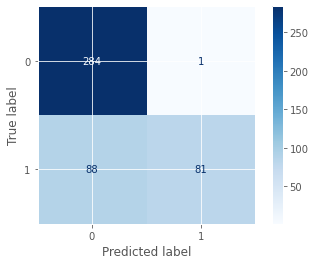

In [27]:
# Train CM
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_train_SC[4], display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)

#### SpectralClustering : Test Confusion Matrix

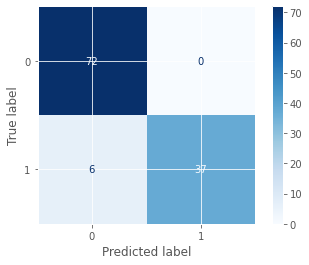

In [28]:
# Test CM
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test_SC[4], display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)

## 1 (b) v. Compare the Results of Supervised, Semi-Supervised, and Unsupervised Learning

#### Supervised Learning:    $\mathscr{L}_1$-Penalized SVM

In [29]:
supervised.describe().loc[['mean']]

,Training_Accuracy,Test_Accuracy,Training_Precision,Test_Precision,Training_Recall,Test_Recall,Training_Fscore,Test_Fscore,Training_AUC,Test_AUC
mean,0.985609,0.904058,0.991541,0.826177,0.969625,0.975969,0.980434,0.88855,0.997377,0.991871


#### Semi-Supervised Learning:  $\mathscr{L}_1$-Penalized SVM

In [30]:
semiSupervised.describe().loc[['mean']]

,Training_Accuracy,Test_Accuracy,Training_Precision,Test_Precision,Training_Recall,Test_Recall,Training_Fscore,Test_Fscore,Training_AUC,Test_AUC
mean,0.961747,0.93913,0.989752,0.916147,0.907495,0.93876,0.945745,0.922208,0.993875,0.989169


#### Unsupervised Learning:  K-Means Algorithm

In [31]:
Kmeans.describe().loc[['mean']]

,Training_Accuracy,Test_Accuracy,Training_Precision,Test_Precision,Training_Recall,Test_Recall,Training_Fscore,Test_Fscore,Training_AUC,Test_AUC
mean,0.927166,0.616812,0.949053,0.592481,0.850296,0.60155,0.896762,0.594126,0.627323,0.625969


#### Unsupervised Learning:  Spectral Clustering

In [32]:
spectralClustering.describe().loc[['mean']]

,Training_Accuracy,Test_Accuracy,Training_Precision,Test_Precision,Training_Recall,Test_Recall,Training_Fscore,Test_Fscore
mean,0.857122,0.84087,0.983076,0.984569,0.627219,0.585271,0.764281,0.718312


From above I can conclude that semi-supervised learning model has the average test accuracy of 0.93913 and followed by the supervised learning method having the average test accuracy of 0.904058.

In comparison to the unsupervised learning methods, both K-means and spectral clustering algorithms underperformed and resulted in lower average test accuracy.

# 2. Active Learning Using Support Vector Machines

## 2 (a) Download the [Banknote Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [3]:
data_header = ["variance", "skewness", "curtosis", "entropy", "class"]
banknote_auth = pd.read_csv('../Data/data_banknote_authentication.csv', names=data_header)
banknote_auth

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
bk_notes = banknote_auth.copy()
X_Bk_notes = bk_notes.loc[:,'variance':'entropy']
y_Bk_notes = bk_notes.loc[:,'class']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Bk_notes, y_Bk_notes, train_size=900, test_size=472, random_state=19)

# 2 (b) i. Passive Learning

In [6]:
test_error_passive_dict={}

# cross validation parameter <C>
params_dict = {'C': np.logspace(-5, 1.5, 15)}

# Run Monte-Carlo Simulation 50 times
for M in range(1,51):
    print("==== ITERATION {} ====".format(M))

    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Bk_notes, y_Bk_notes, train_size=900, test_size=472)

    # Normalize the data
    X_train2 = normalized(X_train2)
    X_test2 = normalized(X_test2)

    test_error = []
    for ten_data_obs in range(1,91):
        # 10 randomly selected data points from the pool
        if ten_data_obs == 90:
            X_train2ten = X_train2
            y_train2ten = y_train2
        else:
            while True:
                X_train2ten, X_test2ten, y_train2ten, y_test2ten = train_test_split(X_train2, y_train2, train_size=10, test_size=(len(X_train2)-10))
                if len(set(y_train2ten)) != 1 and y_train2ten.value_counts()[0] > 1 and y_train2ten.value_counts()[1] > 1:
                    break

        # Add the 10 randomly selected data points to the pool
        if ten_data_obs==1:
            X_headers=list(X_train2)
            X_pool = pd.DataFrame(columns=X_headers)
            X_pool = pd.concat([X_pool, X_train2ten], ignore_index=False)
            y_pool = pd.DataFrame()
            y_pool = pd.concat([y_pool, y_train2ten], ignore_index=False)
        else:
            X_pool = pd.concat([X_pool, X_train2ten], ignore_index=False)
            y_pool = pd.concat([y_pool, y_train2ten], ignore_index=False)

        # Remove the randomly selected data points from the training pool
        X_train2.drop(X_train2ten.index, inplace=True)
        y_train2.drop(y_train2ten.index, inplace=True)

        svc = LinearSVC(penalty='l1', dual=False, max_iter=100000)
        if ten_data_obs==1:
            cv_num=3
        else:
            cv_num=10
        svm = GridSearchCV(estimator=svc, param_grid=params_dict, cv=cv_num)
        svm.fit(X_pool, np.ravel(y_pool))

        # predicted "y" values
        y_predict_test = svm.predict(X_test2)

        # test error
        error = 1-accuracy_score(y_test2, y_predict_test)
        test_error.append(error)
        print("SVM #{} , test error = {}".format(ten_data_obs, error))

    test_error_passive_dict[M] = test_error
    print("")

==== ITERATION 1 ====
SVM #1 , test error = 0.11864406779661019
SVM #2 , test error = 0.05084745762711862
SVM #3 , test error = 0.03601694915254239
SVM #4 , test error = 0.03389830508474578
SVM #5 , test error = 0.04661016949152541
SVM #6 , test error = 0.03177966101694918
SVM #7 , test error = 0.016949152542372836
SVM #8 , test error = 0.02330508474576276
SVM #9 , test error = 0.021186440677966156
SVM #10 , test error = 0.021186440677966156
SVM #11 , test error = 0.021186440677966156
SVM #12 , test error = 0.01906779661016944
SVM #13 , test error = 0.01906779661016944
SVM #14 , test error = 0.01906779661016944
SVM #15 , test error = 0.01906779661016944
SVM #16 , test error = 0.025423728813559365
SVM #17 , test error = 0.021186440677966156
SVM #18 , test error = 0.01906779661016944
SVM #19 , test error = 0.01906779661016944
SVM #20 , test error = 0.01906779661016944
SVM #21 , test error = 0.021186440677966156
SVM #22 , test error = 0.025423728813559365
SVM #23 , test error = 0.02542372

In [7]:
passive_learning_error = pd.DataFrame(test_error_passive_dict)
passive_learning_error

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.118644,0.167373,0.228814,0.012712,0.033898,0.169492,0.451271,0.173729,0.146186,0.095339,...,0.042373,0.192797,0.180085,0.165254,0.345339,0.364407,0.243644,0.309322,0.438559,0.161017
1,0.050847,0.125000,0.129237,0.004237,0.025424,0.097458,0.029661,0.036017,0.038136,0.118644,...,0.016949,0.029661,0.010593,0.019068,0.038136,0.205508,0.023305,0.118644,0.019068,0.139831
2,0.036017,0.072034,0.139831,0.008475,0.025424,0.052966,0.023305,0.021186,0.055085,0.165254,...,0.010593,0.031780,0.019068,0.027542,0.069915,0.197034,0.021186,0.055085,0.050847,0.069915
3,0.033898,0.061441,0.029661,0.038136,0.021186,0.061441,0.010593,0.012712,0.027542,0.165254,...,0.038136,0.023305,0.008475,0.027542,0.036017,0.190678,0.019068,0.057203,0.042373,0.040254
4,0.046610,0.033898,0.029661,0.006356,0.014831,0.050847,0.010593,0.033898,0.029661,0.161017,...,0.021186,0.019068,0.016949,0.025424,0.036017,0.052966,0.019068,0.059322,0.044492,0.023305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.010593,0.025424,0.031780,0.006356,0.008475,0.010593,0.010593,0.010593,0.019068,0.010593,...,0.010593,0.006356,0.006356,0.010593,0.008475,0.016949,0.010593,0.031780,0.023305,0.023305
86,0.008475,0.025424,0.031780,0.006356,0.008475,0.010593,0.010593,0.010593,0.019068,0.010593,...,0.010593,0.006356,0.006356,0.010593,0.008475,0.016949,0.010593,0.031780,0.023305,0.021186
87,0.008475,0.025424,0.031780,0.006356,0.008475,0.010593,0.010593,0.010593,0.019068,0.010593,...,0.010593,0.010593,0.006356,0.010593,0.008475,0.016949,0.010593,0.031780,0.023305,0.021186
88,0.008475,0.025424,0.029661,0.006356,0.008475,0.010593,0.010593,0.010593,0.019068,0.010593,...,0.010593,0.006356,0.006356,0.010593,0.008475,0.016949,0.010593,0.031780,0.023305,0.021186


In [8]:
passive_learning_stats = passive_learning_error.apply(pd.Series.describe, axis=1)
passive_learning_mean_error = passive_learning_stats.loc[:,'mean']
passive_learning_mean_error

0     0.180042
1     0.076568
2     0.055932
3     0.039788
4     0.033432
        ...   
85    0.012712
86    0.013051
87    0.012881
88    0.012881
89    0.012331
Name: mean, Length: 90, dtype: float64

# 2 (b) ii. Active Learning

In [11]:
test_error_active_dict={}

# Cross validation parameter <C>
params_dict2 = {'C': np.logspace(-5, 1.5, 15)}

# Run Monte-Carlo Simulation 50 times
for M in range(1,51):
    print("==== ITERATION {} ====".format(M))

    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Bk_notes, y_Bk_notes, train_size=900, test_size=472)

    # Normalize the data
    X_train2 = normalized(X_train2)
    X_test2 = normalized(X_test2)

    test_error_active=[]
    for ten_data_obs in range(1,91):

        # Obtain a pool of 10 randomly selected data points from the pool
        if ten_data_obs == 1:
            while True:
                while True:
                    X_train2ten, X_test2ten, y_train2ten, y_test2ten = train_test_split(X_train2, y_train2, train_size=10, test_size=890)
                    if len(set(y_train2ten))!=1 and y_train2ten.value_counts()[0]==5 and y_train2ten.value_counts()[1]==5:
                        break

                X_headers=list(X_train2)
                X_pool_temp = pd.DataFrame(columns=X_headers)
                X_pool_temp = pd.concat([X_pool_temp, X_train2ten], ignore_index=False)
                y_pool_temp = pd.DataFrame()
                y_pool_temp = pd.concat([y_pool_temp, y_train2ten], ignore_index=False)

                svc = LinearSVC(penalty='l1', dual=False, max_iter=100000)
                svm = GridSearchCV(estimator=svc, param_grid=params_dict2, cv=3, )
                svm.fit(X_pool_temp, np.ravel(y_pool_temp))

                C = svm.best_params_['C']
                svm_retrain = LinearSVC(C=C, penalty='l1', dual=False, max_iter=100000)
                svm_retrain.fit(X_pool_temp, np.ravel(y_pool_temp))

                # Find the 10 closest points to the hyperplane
                X_train2['dist'] = abs(svm_retrain.decision_function(X_train2))
                X_min_dists = X_train2.nsmallest(10,'dist')
                X_min_dists.drop(['dist'], axis=1, inplace=True)
                min_indexes = X_min_dists.index
                X_train2.drop(['dist'], axis=1, inplace=True)
                y_min_dists = y_train2.loc[min_indexes.tolist()]

                if len(set(y_min_dists)) != 1 and y_min_dists.value_counts()[0] > 1 and y_min_dists.value_counts()[1] > 1:
                    break

        else:
            if ten_data_obs == 90:
                X_pool_temp = pd.concat([X_pool, X_train2], ignore_index=False)
                y_pool_temp = pd.concat([y_pool, y_train2], ignore_index=False)
            else:
                X_train2ten, X_test2ten, y_train2ten, y_test2ten = train_test_split(X_train2, y_train2, train_size=10, test_size=(len(X_train2)-10))
                X_pool_temp = pd.concat([X_pool, X_train2ten], ignore_index=False)
                y_pool_temp = pd.concat([y_pool, y_train2ten], ignore_index=False)

            svmL1active = LinearSVC(penalty='l1', dual=False, max_iter=100000)
            svm = GridSearchCV(estimator=svmL1active, param_grid=params_dict2, cv=10)
            svm.fit(X_pool_temp, np.ravel(y_pool_temp))

            # Retrain the model
            C = svm.best_params_['C']
            svm_retrain = LinearSVC(C=C, penalty='l1', dual=False, max_iter=100000)
            svm_retrain.fit(X_pool_temp, np.ravel(y_pool_temp))

            # Find the 10 closest points to the hyperplane
            X_train2['dist'] = abs(svm_retrain.decision_function(X_train2))
            X_min_dists = X_train2.nsmallest(10,'dist')
            X_min_dists.drop(['dist'], axis=1, inplace=True)
            min_indexes = X_min_dists.index
            X_train2.drop(['dist'], axis=1, inplace=True)
            y_min_dists = y_train2.loc[min_indexes.tolist()]

        # Add the 10 closest points to the hyperplane to the pool
        if ten_data_obs==1:
            X_headers=list(X_train2)
            X_pool = pd.DataFrame(columns=X_headers)
            X_pool = pd.concat([X_pool, X_min_dists], ignore_index=False)
            y_pool = pd.DataFrame()
            y_pool = pd.concat([y_pool, y_min_dists], ignore_index=False)
        else:
            X_pool = pd.concat([X_pool, X_min_dists], ignore_index=False)
            y_pool = pd.concat([y_pool, y_min_dists], ignore_index=False)

        # Remove the randomly selected data points from the training pool
        X_train2.drop(X_min_dists.index, inplace=True)
        y_train2.drop(y_min_dists.index, inplace=True)

        # Retrain the model
        svm_retrain.fit(X_pool, np.ravel(y_pool))

        # predicted "y" values
        y_predict_test = svm_retrain.predict(X_test2)

        # test error
        error = 1-accuracy_score(y_test2,y_predict_test)
        test_error_active.append(error)
        print("SVM #{}, test error = {}".format(ten_data_obs, error))

    test_error_active_dict[M] = test_error_active
    print("")

==== ITERATION 1 ====
SVM #1, test error = 0.6207627118644068
SVM #2, test error = 0.1271186440677966
SVM #3, test error = 0.010593220338983023
SVM #4, test error = 0.014830508474576232
SVM #5, test error = 0.004237288135593209
SVM #6, test error = 0.008474576271186418
SVM #7, test error = 0.006355932203389814
SVM #8, test error = 0.006355932203389814
SVM #9, test error = 0.006355932203389814
SVM #10, test error = 0.006355932203389814
SVM #11, test error = 0.006355932203389814
SVM #12, test error = 0.006355932203389814
SVM #13, test error = 0.006355932203389814
SVM #14, test error = 0.004237288135593209
SVM #15, test error = 0.004237288135593209
SVM #16, test error = 0.004237288135593209
SVM #17, test error = 0.004237288135593209
SVM #18, test error = 0.004237288135593209
SVM #19, test error = 0.004237288135593209
SVM #20, test error = 0.004237288135593209
SVM #21, test error = 0.004237288135593209
SVM #22, test error = 0.004237288135593209
SVM #23, test error = 0.004237288135593209
SV

In [12]:
active_learning_error = pd.DataFrame(test_error_active_dict)
active_learning_error

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.620763,0.508475,0.271186,0.574153,0.588983,0.557203,0.610169,0.372881,0.510593,0.519068,...,0.192797,0.595339,0.398305,0.550847,0.548729,0.506356,0.506356,0.300847,0.154661,0.398305
1,0.127119,0.069915,0.076271,0.038136,0.086864,0.120763,0.059322,0.550847,0.154661,0.050847,...,0.031780,0.055085,0.080508,0.057203,0.480932,0.139831,0.258475,0.050847,0.341102,0.118644
2,0.010593,0.016949,0.019068,0.010593,0.050847,0.105932,0.050847,0.042373,0.019068,0.076271,...,0.029661,0.033898,0.027542,0.027542,0.023305,0.004237,0.292373,0.031780,0.103814,0.029661
3,0.014831,0.027542,0.010593,0.019068,0.036017,0.027542,0.016949,0.010593,0.014831,0.031780,...,0.021186,0.023305,0.093220,0.038136,0.010593,0.014831,0.021186,0.021186,0.057203,0.014831
4,0.004237,0.014831,0.010593,0.014831,0.027542,0.010593,0.029661,0.012712,0.012712,0.016949,...,0.019068,0.019068,0.014831,0.023305,0.010593,0.016949,0.019068,0.012712,0.036017,0.016949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.006356,0.012712,0.012712,0.014831,0.012712,0.008475,0.023305,0.012712,0.010593,0.010593,...,0.014831,0.014831,0.025424,0.004237,0.010593,0.012712,0.014831,0.012712,0.014831,0.021186
86,0.006356,0.012712,0.012712,0.027542,0.012712,0.008475,0.023305,0.012712,0.010593,0.006356,...,0.014831,0.014831,0.033898,0.004237,0.010593,0.012712,0.014831,0.012712,0.014831,0.021186
87,0.006356,0.012712,0.010593,0.014831,0.010593,0.006356,0.023305,0.012712,0.010593,0.006356,...,0.014831,0.010593,0.033898,0.004237,0.010593,0.012712,0.014831,0.012712,0.014831,0.021186
88,0.006356,0.012712,0.016949,0.014831,0.012712,0.006356,0.025424,0.012712,0.010593,0.010593,...,0.014831,0.010593,0.033898,0.004237,0.010593,0.012712,0.014831,0.012712,0.014831,0.021186


In [13]:
active_learning_stats = active_learning_error.apply(pd.Series.describe, axis=1)
active_learning_mean_error = active_learning_stats.loc[:,'mean']
active_learning_mean_error

0     0.481271
1     0.155593
2     0.062669
3     0.041483
4     0.021949
        ...   
85    0.015000
86    0.015000
87    0.014534
88    0.015339
89    0.015636
Name: mean, Length: 90, dtype: float64

## 2 (c) Plot the average test error versus number of training instances for both active and passive learners

Text(0.5, 1.0, 'Passive and Active Errors')

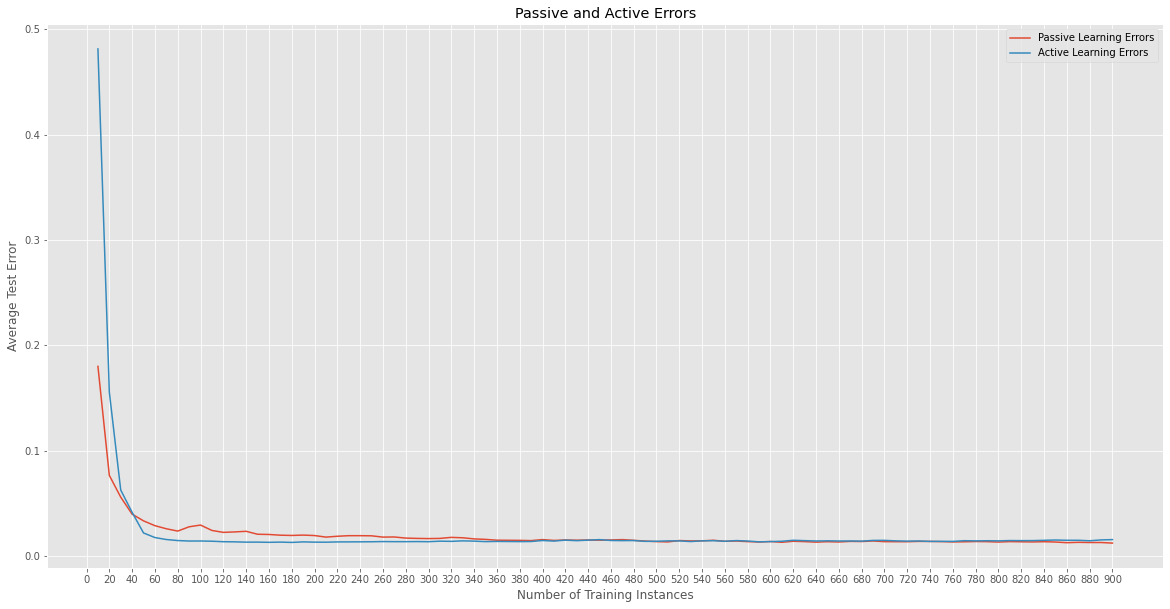

In [14]:
print("Learning Curve by Monte-Carlo simulation")
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(np.arange(10,910,10), passive_learning_mean_error, label='Passive Learning Errors')
plt.plot(np.arange(10,910,10), active_learning_mean_error, label='Active Learning Errors')
plt.xticks(np.arange(0,910,20))
plt.ylabel('Average Test Error')
plt.xlabel('Number of Training Instances')
plt.legend()
plt.title('Passive and Active Errors')

From the above graph following conclusions can be derived :-
1. The test errors decrease as data points are added to the pool, after some point the test errors level off.

2. In case of passive learning, the test errors level off after when approx 340 to 360 data points are added to the pool.

3. In case of active learning, the test errors level off after when approx 60 to 80 data points are added to the pool.

The active learning technique when used with our data set with $\mathscr{L}_1$-penalized SVM was able to build a successful model with fewer data points than the passive learning technique.

# References

K-means++: <https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca>

scikit-learn's cross validation: <https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation>

GridSearchCV: <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html>

scikit-learn's KMeans: <https://scikit-learn.org/stable/modules/clustering.html#k-means>

LinearSVC: <https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC>

plot_confusion_matrix:   <https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py>

SpectralClustering:
- <https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering>
- <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html>